<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/main/12_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
#! rm Colegio_Invisible -r

In [79]:
! pip install Pillow
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git


Cloning into 'Colegio_Invisible'...
remote: Enumerating objects: 1015, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 1015 (delta 13), reused 0 (delta 0), pack-reused 990
Receiving objects: 100% (1015/1015), 67.52 MiB | 29.93 MiB/s, done.
Resolving deltas: 100% (694/694), done.


for an image...there are pixels

each pixel has 3,4 values (Red Green Blue and sometime Alpha)

those numbers are...1 byte...0 to 255

In [2]:
from PIL import Image
import numpy as np

In [3]:
64*8

512

what can we put into blockchain...
Op_Return
80 bytes and we will use 64 bytes for image data

each byte is made up of 8 binary values 1/0 called bits

64 bytes = 64*8...512 bits

We want to put image in single block

PROPOSAL:

16x16 image = 256 pixels

only get to use 2 bits per pixel

- 0,0  0 
- 0,1  64
- 1,0  128
- 1,1  192

1 byte [ , , , , , , , ]

1 byte can tell us color of 4 pixels
each one taking up 2 bits

In [ ]:
""

In [4]:
!ls Colegio_Invisible/img

Apollo_Slays_Python_1853.jpeg  colegio_invisible.jpeg  rum_1.jpeg
asymmetric.png		       hg_cry.jpeg	       rum_2.jpeg
bab_crop.jpeg		       hg_drop.jpeg	       rum_3.jpeg
barb_1.jpeg		       hg_hide.jpeg	       rum_4.jpeg
barb_2.jpeg		       hg_house.jpeg	       rum_5.jpeg
barb_3.jpeg		       hg_invite.jpeg	       rum_6.jpeg
barb_4.jpeg		       hg_rough.png	       rum_7.jpeg
barb_5.jpeg		       hg_xmas.jpeg	       rump_final.jpeg
barb_6.jpeg		       prv_pub_addr.png        signature.png
barb_7.jpeg		       PubKeyToAddr.png        stego.png
clavis.jpeg		       rum_0.jpeg	       symmetric.png


In [80]:
stego_image=Image.open('Colegio_Invisible/img/zomnd.png')
stego_image=stego_image.resize((16,16))
stego_image

In [81]:
type(stego_image)

PIL.Image.Image

In [82]:
stego_array = np.array(stego_image)
stego_array

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [246, 246, 246, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [230, 230, 230, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [250, 250, 250, 255],
        [200, 200, 200, 255],
        ...,
        [254, 254, 254, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [252, 252, 252, 255],
        [243, 243, 243, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

**`uint8`** stands for unsigned 8-bit integer
- 8 binary 1/0 values
- that is one byte
- a number from 0-255
- two hex values like ff

In [83]:
stego_array.dtype

dtype('uint8')

In [84]:
stego_array.shape

(16, 16, 4)

In [85]:
stego_array[:,:,:3]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [241, 241, 241],
        [181, 181, 181],
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [245, 245, 245],
        [234, 234, 234],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [225, 225, 225],
        [175, 175, 175],
        [223, 223, 223],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [231, 231, 231],
        [171, 171, 171],
        [169, 169, 169],
        [246, 246, 246],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [199, 199, 199],
        [227, 227, 227],
        [164, 164, 164],
        [202, 202, 20

In [86]:
stego_array_grey=stego_array[:,:,:3].mean(axis=2).astype('uint8')
stego_array_grey.shape,stego_array_grey.dtype

((16, 16), dtype('uint8'))

In [87]:
stego_array_grey

array([[255, 255, 255, 255, 241, 181, 254, 255, 255, 255, 255, 245, 234,
        255, 255, 255],
       [255, 255, 255, 255, 225, 175, 223, 255, 255, 255, 231, 171, 169,
        246, 255, 255],
       [255, 255, 255, 255, 199, 227, 164, 202, 212, 214, 179, 221, 188,
        230, 255, 255],
       [255, 255, 255, 242, 161, 232, 241, 234, 225, 188, 217, 184, 187,
        227, 255, 255],
       [255, 255, 236, 187, 239, 250, 252, 252, 255, 240, 173, 220, 183,
        237, 255, 255],
       [255, 255, 194, 221, 159, 226, 236, 235, 237, 255, 234, 191, 158,
        215, 255, 255],
       [255, 244, 200, 204,  75, 228, 221,  86, 142, 254, 241, 238, 201,
        197, 255, 255],
       [255, 222, 213, 140, 161, 253, 247, 184, 226, 247, 237, 231, 245,
        193, 255, 255],
       [255, 210, 159,  53,  75, 235, 255, 252, 251, 253, 253, 250, 231,
        199, 240, 255],
       [255, 205, 176,  74, 153, 228, 249, 255, 255, 255, 255, 243, 245,
        224, 216, 255],
       [255, 217, 220, 124, 13

In [88]:
stego_image_grey = Image.fromarray(stego_array_grey)
stego_image_grey

In [89]:
print(150%64)
print(150-22)

22
128


In [93]:
stego_array_grey_2b=stego_array_grey-(stego_array_grey%64)+63
stego_array_grey_2b

array([[255, 255, 255, 255, 255, 191, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255],
       [255, 255, 255, 255, 255, 191, 255, 255, 255, 255, 255, 191, 191,
        255, 255, 255],
       [255, 255, 255, 255, 255, 255, 191, 255, 255, 255, 191, 255, 191,
        255, 255, 255],
       [255, 255, 255, 255, 191, 255, 255, 255, 255, 191, 255, 191, 191,
        255, 255, 255],
       [255, 255, 255, 191, 255, 255, 255, 255, 255, 255, 191, 255, 191,
        255, 255, 255],
       [255, 255, 255, 255, 191, 255, 255, 255, 255, 255, 255, 191, 191,
        255, 255, 255],
       [255, 255, 255, 255, 127, 255, 255, 127, 191, 255, 255, 255, 255,
        255, 255, 255],
       [255, 255, 255, 191, 191, 255, 255, 191, 255, 255, 255, 255, 255,
        255, 255, 255],
       [255, 255, 191,  63, 127, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255],
       [255, 255, 191, 127, 191, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255],
       [255, 255, 255, 127, 19

In [96]:
stego_image_grey_2b = Image.fromarray(stego_array_grey_2b)
stego_image_grey_2b

In [97]:
def int_2_bit_array(num):
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(8-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

In [98]:
int_2_bit_array(0)

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [22]:
int_2_bit_array(64)

array([0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [23]:
int_2_bit_array(128)

array([1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [24]:
int_2_bit_array(192)

array([1, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [25]:
int_2_bit_array(153)

array([1, 0, 0, 1, 1, 0, 0, 1], dtype=uint8)

Goal:

- take image of 256 bytes and reduce each byte to 2 bit in form of 2 element array
- turn that all into 512 bits
- turn 512 bits into 64 bytes

# Generalize Standard For Images (MxN)

If we create a standard for the header that describes the data stored then we can choose the following paramenters:

- length
- width
- color dim 
- color bit count

In total the number of bits is the product of all the parameters

## Greyscale Image 

## RGB Image

## Two Channel Color Standard

## Four Channel

## General Color Dim



In [28]:
import numpy as np
np.packbits(np.array([True]))

array([128], dtype=uint8)

In [29]:
def message_2_bit_array(message,mode=None):
    '''This function takes in a message as string, bytestring or hextring.
    If hexstring input the set mode='hex' '''
    if type(message)==bytes:
        hex_str=message.hex()
    elif (type(message)==str):
        if mode not in ('hex','hexstring'):
            hex_str=message.encode().hex()
        else:
            hex_str=message
    else:
        print('fix the input and mode')
        return None
    
    num=int('0x'+hex_str,base=16)
    byte_len=(len(hex_str)+1)//2
    bit_len=byte_len*8
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(bit_len-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

def bit_array_2_byte_str(bit_array):
    '''Convert bit array to a bytestring'''
    bit_list=[ str(bit) for bit in bit_array]
    bin_str='0b'+(''.join(bit_list))
    num=int(bin_str,base=2)
    return num.to_bytes(len(bit_array)//8,'big')

def bit_array_2_hex_str(bit_array):  
    '''Convert a bit array to a hexstring'''
    return bit_array_2_byte_str(bit_array).hex()

def bit_array_2_str(bit_array,encoding='utf-8'):
    '''Convert a bit array to a string'''
    return bit_array_2_byte_str(bit_array).decode(encoding)

In [30]:
message_2_bit_array(b'sdjnvsdjnskjnv',mode=None)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0], dtype=uint8)

Now we need a to function that 
- takes an image and turns to a bit array
- takes *uint8* value and turns to bit array

In [49]:
def int2bitarray(x,bit=8):
  return message_2_bit_array(hex(x)[2:],mode='hex')[:bit]

In [50]:
A=int2bitarray(90)
A

array([0, 1, 0, 1, 1, 0, 1, 0], dtype=uint8)

In [51]:
A7=int2bitarray(90,bit=7)
A7

array([0, 1, 0, 1, 1, 0, 1], dtype=uint8)

In [52]:
A2=int2bitarray(90,bit=2)
A2

array([0, 1], dtype=uint8)

In [53]:
(2**np.arange(7,-1,-1))

array([128,  64,  32,  16,   8,   4,   2,   1])

In [54]:
def bitarray2int(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return (b_arr*scales).sum()

In [55]:
B=int2bitarray(255,bit=2)
B

array([1, 1], dtype=uint8)

In [56]:
bitarray2int(A)

90

In [57]:
bitarray2int(B)

192

In [58]:
def bitarray2int_scale(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return int((b_arr*scales).sum()*255/bitarray2int(np.ones(ln,dtype='uint8')))

In [59]:
bitarray2int_scale(B)

255

In [60]:
bitarray2int_scale(np.array([1,1]))

255

In [100]:
def imgarr2bitarray(imgarr,bit=8):
  return np.array([ int2bitarray(it,bit) for it in imgarr.reshape(-1)]).reshape(-1)

In [1]:
imgarr2bitarray(stego_array_grey,2)

NameError: ignored

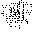

In [105]:
Image.fromarray(imgarr2bitarray(stego_array_grey,4).reshape(32,32)*255)

In [103]:
64*32/8

256.0

In [104]:
Image.fromarray(imgarr2bitarray(stego_array_grey,1).reshape(16,16)*255)